# **필요한 라이브러리/프레임워크 설치**

In [1]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
!pip3 install /tmp/mecab-python-0.996
!pip3 install konlpy
!pip install newspaper3k
!pip install wordcloud
!apt-get install fonts-nanum* -qq

import nltk
nltk.download('punkt')

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.
Processing /tmp/mecab-python-0.996
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for mecab-python: filename=mecab_python-0.996_ko_0.9.2-cp37-cp37m-linux_x86_64.whl size=141811 sha256=90674717a7ea1c62e500a150aff1aed58e59f9afe19cc7407f061f86268e5dbe
  Stored in directory: /root/.cache/pip/wheels/40/7b/9f/2922869bef86c3354ae7034f7a3647c573ee1997c2dad0290a
Failed to build mecab-python
  Attempting uninstall: mecab-python
    Found existing installation: mecab-python 0.996-ko-0.9.2
    Uninstalling mecab-python-0.996-ko-0.9.2:
  

True

# **데이터 크롤링1 : BeautifulSoup**

In [2]:

import urllib.request
from datetime import *
from bs4 import BeautifulSoup

from gensim.summarization.summarizer import summarize
import nltk
from newspaper import Article
from nltk.tokenize import sent_tokenize
import re

this_week = date.today().isoformat().replace("-", ".")
last_week = (date.today() - timedelta(weeks = 1)).isoformat().replace("-", ".")
page_num = 1
href = ''


links = []


#네이버 기사
for i in range(5):
  url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%84%B1%EA%B7%A0%EA%B4%80%EB%8C%80%ED%95%99%EA%B5%90&sort=0&photo=0&field=0&pd=1&ds={0}&de={1}&cluster_rank=34&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:1w,a:all&start={2}'.format(last_week, this_week, page_num)
  # url 주소를 웹 페이지 읽어 오기
  html = urllib.request.urlopen(url).read()
  # HTML 데이터를 BeautifulSoup 읽기 
  soup = BeautifulSoup(html, 'html.parser')
  # a 태그 중 클래스가 new_title인 태그
  this_articles = soup.select('a[class="news_tit"]')
  for h in range(len(this_articles)):
    links.append(this_articles[h]['href'])    
  page_num += 10


# **데이터크롤링2: Newspaper Article() class**

In [3]:

infos = {}
index = 0
for i in links:
  try:
    news_url = i
    news = Article(news_url, language='ko')
    news.download()
    news.parse()
    text = news.text
    title = news.title
    if (len(title) <= 1):
      continue
    info = [index, title, text, i]
    infos[index] = info
    index += 1
    print(index, info)
  except:
    continue




1 [0, "성균관대, 'CNS연구센터 및 FabLab동' 신축 기공식", "1'요금 원가주의' 약속한 정부…한전 실적 개선되나\n\n정부가 탄소중립 이행 과정에서 전기요금에 대한 원가 반영 원칙을 강조했다. 이에 따라 원가 변동 요인과 전기요금 간 연계성이 강화될지 주목된다. 정부는 지난 10일 발표한 '에너지 탄소중립 혁신전략'에서 내년부터 원가주의 요금체계의 단계적 정착을 추진한다는 방침을 밝혔다. 전기의 생산·거래·소비 전 과정에 공급비용이 요금으로 회수해, 가격기능 회복과 시장 혁신을 촉진하겠단 구상이다. 이는 '적정 원가 보상'이라는 공공요금 산정에 관한 원칙을 더욱 명확히 하겠다는 뜻으로 풀이된다. 이에 연료비 증가분과", 'http://www.newsis.com/view/?id=NISX20211210_0001683374&cID=10201&pID=10200']
2 [1, '유한양행, 성균관대 중추신경계 연구센터 기공…“글로벌 선도그룹으로 도약”', '0 지난 9일 성균관대 자연과학캠퍼스에서 열린 ‘CNS연구센터 및 FabLab동’ 신축 기공식에서 주요 인사들이 테이프 커팅을 하고 있다. 왼쪽 여섯번째부터 신동렬 성균관대학교 총장, 김준영 학교법인 성균관대학교 이사장, 이정희 유한양행 이사회 의장, 조욱제 유한양행 사장, 김한주 아임뉴런 대표이사. /사진=성균관대학교\n\n성균관대학교(신동렬 총장)와 유한양행(조욱제 대표이사 사장), 아임뉴런바이오사이언스(김한주 대표이사)는 지난 9일 성균관대 자연과학캠퍼스에서 ‘CNS연구센터 및 FabLab동’ 신축 기공식을 개최했다고 10일 밝혔다.\n\n성균관대, 유한양행, 아임뉴런은 지난해 9월, ‘산학융합 뇌질환 R&BD 생태계 구축사업’을 위한 3자 협력계약을 체결한 바 있으며, 이를 바탕으로 CNS연구센터 및 FabLab동 신축을 추진해왔다.\n\nCNS연구센터 및 FabLab동에는 뇌 과학 등 미래 유망 분야를 선도하기 위한 최첨단 연구 시설 및 실험동물 센터 등을 구축할 계획이다.\n\n또한 유한양행

# **데이터 전처리: 불용어 제거&구두점/띄어쓰기 교정**

In [4]:
test = []
for key, value in infos.items():
  ts = value[2].split('.')
  add = ""
  for t in ts:
    temp = re.sub("[A-Z]+\)", "", t) #A)
    temp = re.sub('\(.*\)|\s-\s.*', "", temp) #(누구누구 설명)
    temp = re.sub('\[.*\]|\s-\s.*', "", temp) #[언론사=홍길동 기자]
    temp = re.sub('\<.*\>|\s-\s.*', "", temp)
    temp = re.sub("viewer [가-힣a-zA-Z0-9 ]+ ", "", temp) #viewer 홍길동(왼쪽부터) 사진 소개
    temp = re.sub("[a-zA-Z0-9+-_.]+@+[a-zA-Z0-9+=_. ]+", "", temp) #메일주소
    temp = re.sub(r'[^가-힣a-zA-Z0-9 ]', '', temp) #특수문자
    temp = re.sub("저작권자|파이낸셜뉴스|무단전재|재배포|금지", '', temp) #기사정보
    temp = temp.strip(" ")
    add += ". "+temp
  add = add.lstrip(".")
  value[2] = add

# **키워드 분석 : Mecab(), Counter() class**

In [5]:
from konlpy.tag import Mecab
from collections import Counter

mecab = Mecab()

total_rank = {}
for key, value in infos.items():
  n = mecab.nouns(value[2])
  n = [a for a in n if len(a) > 1 and a!="성균관"]
  count = Counter(n)
  rank = count.most_common(10)
  easy_rank = []
  for r in rank:
      easy_rank.append(list(r))
      total_rank[r[0]] = r[1]
  easy_rank.sort(key=lambda x: -x[1])
  value.append(easy_rank)

sorted(total_rank.items(), key=lambda x: -x[1])


[('의원', 37),
 ('브랜드', 33),
 ('지수', 33),
 ('윤석열', 24),
 ('고려대', 22),
 ('거래', 22),
 ('수학', 21),
 ('부문', 20),
 ('평판', 20),
 ('계열', 19),
 ('학부', 19),
 ('일자리', 18),
 ('평가', 18),
 ('학교', 18),
 ('경영', 17),
 ('모집', 17),
 ('공학부', 16),
 ('의대', 15),
 ('충남', 15),
 ('청년', 15),
 ('정시', 14),
 ('연세대', 14),
 ('이명수', 14),
 ('영웅', 14),
 ('선발', 14),
 ('과생', 14),
 ('로스쿨', 14),
 ('서울대', 13),
 ('중고', 13),
 ('계약', 13),
 ('지역', 13),
 ('등급', 13),
 ('무능', 13),
 ('엑시톤', 13),
 ('총장', 13),
 ('수술', 13),
 ('북대', 13),
 ('학과', 12),
 ('지사', 12),
 ('인재', 12),
 ('지난해', 12),
 ('대선', 12),
 ('포럼', 12),
 ('대구대', 12),
 ('선거', 12),
 ('분석', 12),
 ('합격자', 12),
 ('이상', 11),
 ('영어', 11),
 ('점수', 11),
 ('에브리', 11),
 ('타임', 11),
 ('사기', 11),
 ('우리', 11),
 ('검사', 11),
 ('대자보', 11),
 ('토론', 11),
 ('가군', 11),
 ('지원', 10),
 ('자연', 10),
 ('피해', 10),
 ('국민', 10),
 ('충청', 10),
 ('바이오', 10),
 ('사업단', 10),
 ('인문', 10),
 ('시간', 10),
 ('한국', 10),
 ('경우', 10),
 ('나군', 10),
 ('비중', 10),
 ('예상', 9),
 ('개발', 9),
 ('커뮤니티', 9),
 ('의료', 9),
 ('재단', 9)

In [6]:

for i, text in infos.items():
  if(len(text[2]) <= 50):
    continue
  s = summarize(text[2], word_count=50)
  print("i. ", s, "\n")
  text[2] = s


i.  1요금 원가주의 약속한 정부한전 실적 개선되나정부가 탄소중립 이행 과정에서 전기요금에 대한 원가 반영 원칙을 강조했다.
이에 따라 원가 변동 요인과 전기요금 간 연계성이 강화될지 주목된다.
정부는 지난 10일 발표한 에너지 탄소중립 혁신전략에서 내년부터 원가주의 요금체계의 단계적 정착을 추진한다는 방침을 밝혔다.
이는 적정 원가 보상이라는 공공요금 산정에 관한 원칙을 더욱 명확히 하겠다는 뜻으로 풀이된다. 

i.  성균관대 유한양행 아임뉴런은 지난해 9월 산학융합 뇌질환 RBD 생태계 구축사업을 위한 3자 협력계약을 체결한 바 있으며 이를 바탕으로 CNS연구센터 및 FabLab동 신축을 추진해왔다.
CNS연구센터에 입주예정인 김한주 아임뉴런 대표는 CNS연구센터 설립을 시작으로 기업과 대학의 역량을 총결집한 지속가능한 산학융합 생태계 조성을 완성해 갈 것이라며 아임뉴런은 첨단 생명공학 분야에서 지속적인 원천기술 개발 및 신약개발을 통해 국가 바이오산업에 기여하겠다고 밝혔다. 

i.  의치약학 계열과 한의대 지원 가능선은 서울대 의예 430점 약학 416점 연세대 의예 429점 치의예 417점 약학 411점 성균관대 의예 426점 약학 410점 고려대 의과 424점 경희대 의예 422점 약학한의예 410점 한양대 의예 421점 중앙대 의학 420점 약학 411점 이화여대 의예 418점 약학 410점 등으로 추정됐다. 

i.   

i.  의치약학 계열과 한의대 지원 가능선은 서울대 의예 430점 약학 416점 연세대 의예 429점 치의예 417점 약학 411점 성균관대 의예 426점 약학 410점 고려대 의과 424점 경희대 의예 422점 약학한의예 410점 한양대 의예 421점 중앙대 의학 420점 약학 411점 이화여대 의예 418점 약학 410점 등으로 추정됐다. 

i.  아임뉴런성균관대와 맞손 세계적 선도그룹 도약 전망 유한양행은 CNS연구센터 및 팹랩동 신축 기공식을 9일 성균관대 자연과학캠퍼스에서 개최했다고 10일 밝혔다.
유한양행은 C

결과

#분석 결과 시각화

Shorts_SKKU:  2021 년 12 월 12 일


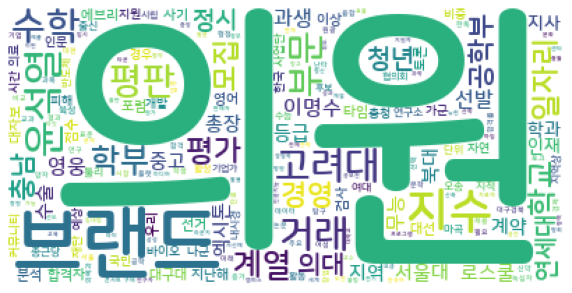

In [7]:
from wordcloud import WordCloud
import matplotlib.font_manager as fm


print("Shorts_SKKU: ", str(date.today().year), "년", str(date.today().month) , "월", str(date.today().day), "일")

# sys_font = fm.findSystemFonts()
# print([f for f in sys_font if 'Nanum' in f])

wc = WordCloud(font_path="/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf",background_color="white", max_font_size=200)
cloud = wc.generate_from_frequencies(dict(total_rank))


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

# **사용자와 상호작용**

In [ ]:
while(True):
  for i, v in infos.items():
    print(v[0],".", v[1])
    for tag in v[4][:5]:
      print("#", tag[0], end = " ")
    print("\n")

  command = input("{번호.}를 입력하시면 요약문을 볼 수 있습니다.\n{번호. 더보기}를 입력하시면 원문 링크를 알려드립니다.\n{나가기}를 입력하시면 종료하실 수 있습니다.\n입력: ")
  if(command == "나가기"):
    break
  else:
    com = command.split(".")
    if(len(com[1]) == 0):
      info = infos[int(com[0])]
      print(info[2])
    else:
      info = infos[int(com[0])]
      print(info[3])


0 . 성균관대, 'CNS연구센터 및 FabLab동' 신축 기공식
# 요금 # 정부 # 전기 # 원가 # 원가주의 

1 . 유한양행, 성균관대 중추신경계 연구센터 기공…“글로벌 선도그룹으로 도약”
# 연구 # 센터 # 유한양행 # 아임 # 뉴런 

2 . 서울 주요대 정시, 인문계 380점·자연계 394점
# 약학 # 경영 # 계열 # 공학 # 지원 

3 . [포토] 성균관대서 열린 종로학원 2022 대입 설명회
# 정시 # 종로 # 학원 # 대입 # 특별 

4 . SKY 경영 404점·의예 424점 이상 정시지원 가능
# 약학 # 경영 # 지원 # 계열 # 공학 

5 . 유한양행, 성균관대에 CNS연구센터 신축…2024년 완공
# 연구 # 센터 # 유한양행 # 신축 # 과학 

6 . SKY 의대 합격선 '424~430점'...주요대 경영 '382~413점'
# 대학 # 의대 # 예상 # 경영 # 계열 

7 . 파미노젠, 성균관대 생명공학대학과 표적항암제 공동개발 업무협약
# 개발 # 신약 # 연구 # 파미 # 인공지능 

8 . "졸업생인데 에어팟 팝니다" 대학 동문 사이트서 후배 등치는 선배
# 거래 # 중고 # 에브리 # 타임 # 사기 

9 . 반도체학과 132대1...의·약대만큼 인기
# 계약 # 학과 # 대학 # 기업 # 교육 

10 . '행정의 달인' 이명수 의원, '우리 안의 영웅을 찾아서' 출판기념회 대성황
# 의원 # 충남 # 이명수 # 영웅 # 지사 

11 . 유한양행, 성균관대 CNS 연구센터 신축 기공식 개최 外
# 연구 # 바이오 # 센터 # 검사 # 의료 

12 . 성균관대, 10일부터 2022학년도 정시지원전략설명회
# 요금 # 정부 # 전기 # 원가 # 원가주의 

13 . 찔끔 지원에 구색 맞추기 文 일자리 정책…“백지서 새판 짜야”
# 일자리 # 청년 # 지원 # 지적 # 교수 

14 . “서울대 의대 가려면 수능 몇 점이어야 할까?” 입시학원 답변이…
# 점수 # 예상 # 서울대 # 지원 # 의예과 

15